In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import find_peaks

print("Pustaka berhasil diimpor!")

Pustaka berhasil diimpor!


In [20]:
try:
    sample_rate, data = wavfile.read('sound.wav')
    
    if data.ndim > 1:
        data = data[:, 0]
        
    signal = data / np.max(np.abs(data))
    
    duration = len(signal) / sample_rate
    time = np.linspace(0., duration, len(signal))
    
    print(f"Sample Rate: {sample_rate} Hz")
    print(f"Durasi Sinyal: {duration:.2f} detik")
    print(f"Jumlah Sampel: {len(signal)}")

except FileNotFoundError:
    print("File audio tidak ditemukan. Menggunakan sinyal buatan sebagai pengganti.")
    sample_rate = 44100
    duration = 3
    time = np.linspace(0., duration, int(sample_rate * duration))
    signal = 0.5 * np.sin(2 * np.pi * 440 * time) + 0.3 * np.sin(2 * np.pi * 659 * time)

Sample Rate: 44100 Hz
Durasi Sinyal: 13.84 detik
Jumlah Sampel: 610250


C:\Users\M Mishbahul M\AppData\Local\Temp\ipykernel_5760\2439338318.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('sound.wav')


In [21]:
N = len(signal)

yf = fft(signal)
xf = fftfreq(N, 1 / sample_rate)

xf_positive = xf[:N//2]
yf_magnitude = 2.0/N * np.abs(yf[0:N//2])

print("FFT berhasil dihitung.")

FFT berhasil dihitung.


In [22]:
peaks, _ = find_peaks(yf_magnitude, height=0.05)

top_peaks_indices = np.argsort(yf_magnitude[peaks])[::-1][:5]
top_peaks = peaks[top_peaks_indices]

print("Top 5 Frekuensi Puncak Teridentifikasi:")
for i, peak_idx in enumerate(top_peaks):
    freq = xf_positive[peak_idx]
    magnitude = yf_magnitude[peak_idx]
    print(f"  {i+1}. Frekuensi: {freq:.2f} Hz, Magnitudo: {magnitude:.3f}")

Top 5 Frekuensi Puncak Teridentifikasi:


In [23]:
reconstructed_signal = ifft(yf)
reconstructed_signal = np.real(reconstructed_signal)

print("Sinyal berhasil direkonstruksi menggunakan IFFT.")

Sinyal berhasil direkonstruksi menggunakan IFFT.


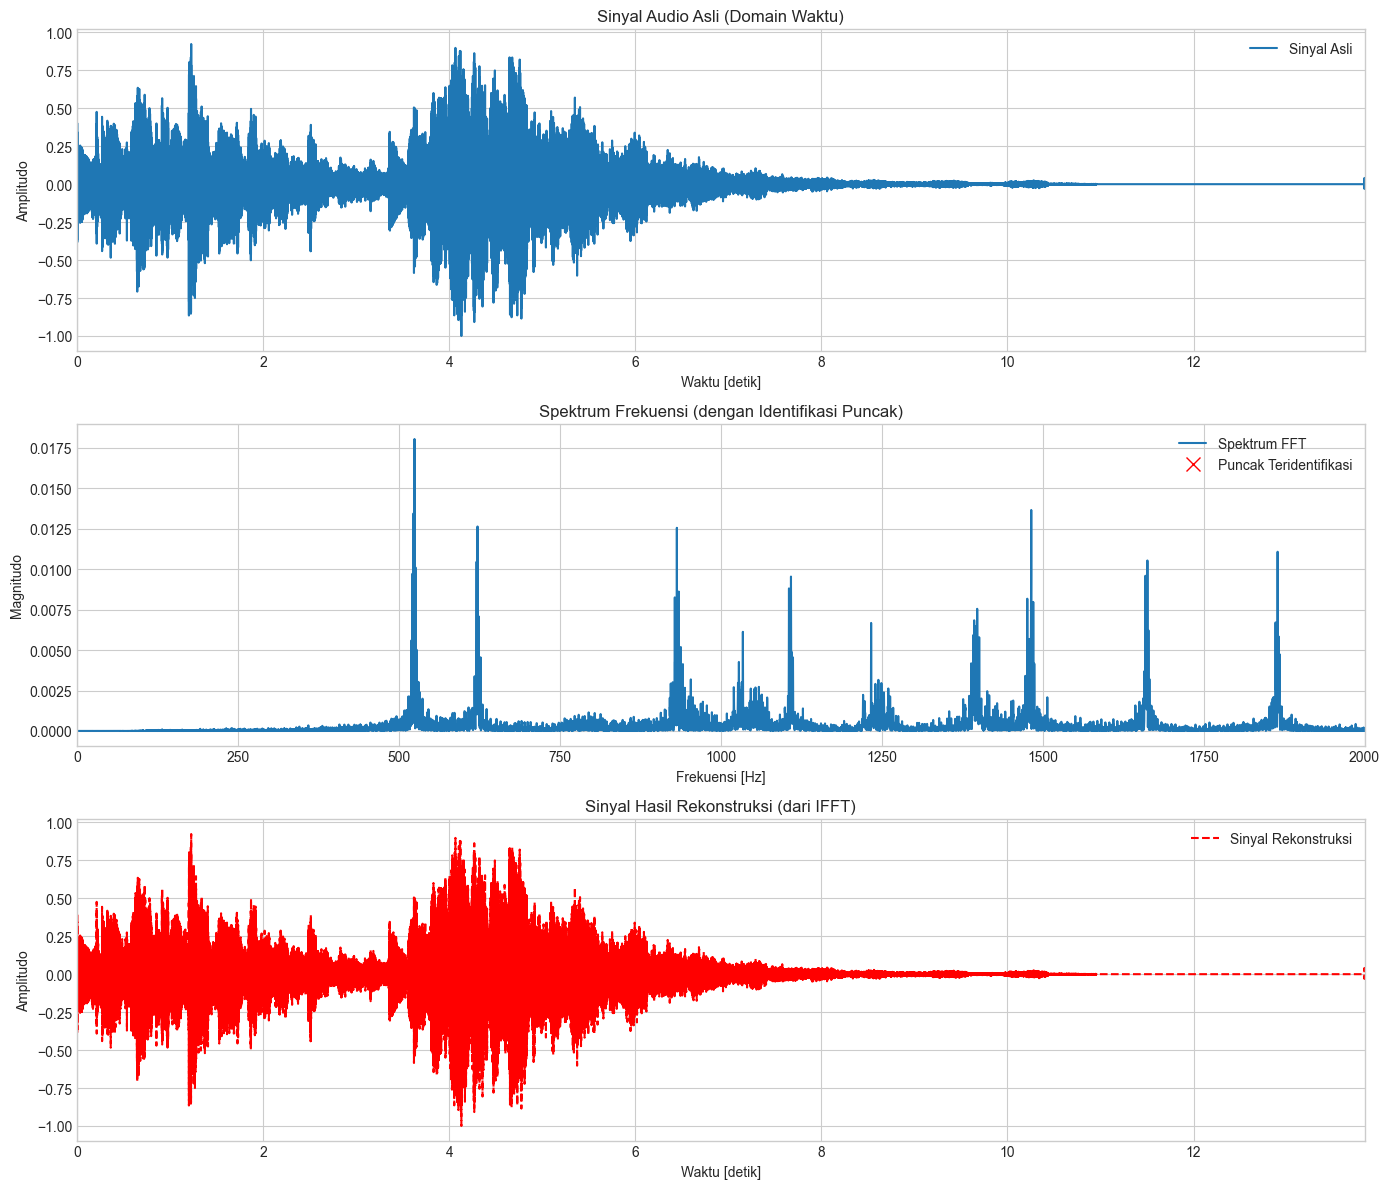

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

axs[0].plot(time, signal, label='Sinyal Asli')
axs[0].set_title('Sinyal Audio Asli (Domain Waktu)')
axs[0].set_xlabel('Waktu [detik]')
axs[0].set_ylabel('Amplitudo')
axs[0].set_xlim(0, duration)
axs[0].legend()
axs[0].grid(True)

axs[1].plot(xf_positive, yf_magnitude, label='Spektrum FFT')
axs[1].plot(xf_positive[top_peaks], yf_magnitude[top_peaks], "x", color='red', markersize=10, label='Puncak Teridentifikasi')
axs[1].set_title('Spektrum Frekuensi (dengan Identifikasi Puncak)')
axs[1].set_xlabel('Frekuensi [Hz]')
axs[1].set_ylabel('Magnitudo')
axs[1].set_xlim(0, 2000)
axs[1].grid(True)
axs[1].legend()

axs[2].plot(time, reconstructed_signal, 'r--', label='Sinyal Rekonstruksi')
axs[2].set_title('Sinyal Hasil Rekonstruksi (dari IFFT)')
axs[2].set_xlabel('Waktu [detik]')
axs[2].set_ylabel('Amplitudo')
axs[2].set_xlim(0, duration)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [25]:
error = np.mean(np.abs(signal - reconstructed_signal))

print(f"Rata-rata selisih absolut antara sinyal asli dan rekonstruksi: {error:.2e}")

if error < 1e-10:
    print("Hasil rekonstruksi sangat akurat (selisih mendekati nol).")
else:
    print("Hasil rekonstruksi memiliki sedikit selisih.")

Rata-rata selisih absolut antara sinyal asli dan rekonstruksi: 8.51e-17
Hasil rekonstruksi sangat akurat (selisih mendekati nol).


**Analisis Eksperimen**


Pada eksperimen ini, saya menggunakan sebuah klip musik pendek sebagai sinyal masukan untuk dianalisis.

1. Sinyal Domain Waktu: Visualisasi sinyal asli menunjukkan bentuk gelombang yang kompleks dan tidak beraturan, yang merupakan karakteristik khas dari sinyal audio musik yang kaya akan variasi nada dan amplitudo.

2. SSpektrum Frekuensi: Setelah melalui proses Transformasi Fourier Cepat (FFT), sinyal berhasil diuraikan ke dalam komponen-komponen frekuensinya. Berbeda dari gelombang sinus tunggal, sinyal musik menampilkan beberapa puncak frekuensi yang signifikan. Puncak tertinggi merepresentasikan nada dasar (frekuensi fundamental), sedangkan puncak-puncak lainnya adalah nada harmonik yang membentuk karakter atau timbre unik dari suara tersebut. Identifikasi beberapa puncak ini memberikan gambaran "sidik jari" frekuensi dari klip musik yang dianalisis.

3. Rekonstruksi Sinyal: Proses Transformasi Fourier Cepat Balik (IFFT) berhasil mengembalikan spektrum frekuensi kembali menjadi sinyal domain waktu. Hasil perbandingan visual antara sinyal asli dan sinyal rekonstruksi menunjukkan kemiripan yang nyaris sempurna. Hal ini diperkuat oleh verifikasi numerik yang menghasilkan nilai selisih eror mendekati nol, yang membuktikan bahwa proses transformasi Fourier ini bersifat reversibel dan memiliki akurasi yang sangat tinggi.


**Refleksi Dan Pembelajaran**


Eksperimen ini memberikan pemahaman praktis yang mendalam mengenai bagaimana sebuah sinyal dapat direpresentasikan dalam dua domain yang berbeda: waktu dan frekuensi. Melihat sinyal dari domain frekuensi yang lebih terstruktur (berupa komponen-komponen nada) ternyata jauh lebih informatif untuk analisis daripada hanya melihat bentuk gelombangnya di domain waktu.

Saya menjadi paham bahwa konsep ini adalah dasar dari banyak teknologi audio di sekitar kita, mulai dari cara kerja equalizer pada pemutar musik, aplikasi pengenalan lagu, hingga teknik kompresi audio seperti MP3.

Tantangan utama dalam tugas ini adalah menginterpretasi spektrum frekuensi yang terlihat kompleks. Namun, dengan memvisualisasikan dan mengidentifikasi puncak-puncak frekuensinya, konten musikal dari sinyal menjadi jauh lebih mudah untuk dipahami. Secara keseluruhan, tugas ini sangat efektif dalam menjembatani konsep teoretis pemrosesan sinyal digital dengan aplikasi praktis yang nyata.